<h1 style="text-align: center;"> Tarea Minería de Datos y Modelización Predictiva </h1>
<h1 style="text-align: right; font-size: 24px; margin-right: 10px;">Guillermo Díaz Aguado</h1>

In [97]:
import pandas as pd
import numpy as np
from collections import defaultdict
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from FuncionesMineria import (patron_perdidos, ImputacionCuant, ImputacionCuali, graficoVcramer, mosaico_targetbinaria, boxplot_targetbinaria, 
                           hist_targetbinaria, Transf_Auto, lm, lm_stepwise, lm_forward, lm_backward, Rsq, validacion_cruzada_lm,
                           modelEffectSizes, crear_data_modelo,analizar_variables_categoricas,
                           hist_target_categorica)

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 




## 1. Introducción al objetivo del problema y las variables implicadas.

Realizaremos un estudio sobre el modelado la abstención de voto en una base de datos que contiene información sobre los distintos municipios. La abstención, considerada como variable dependiente, se evalúa desde dos perspectivas: una dicotómica (1 si el porcentaje es mayor a 30, 0 en caso contrario) y otra continua (porcentaje de abstenciones).

Uno de los objetivos del estudio es ver si tanto para la variable dicotomica como para la continua, los modelos siguen escogiendo las mismas varibles independientes y de ser así, cual sería el peso de estas variables. Tambíen será interesente cual tiene menos error y si usan el mismo modelo o no.


<span style="color:red;">La verdad es que he tenido muchos problemas que no he sido capaz de solucionar debido al tiempo y a la dificultad implicada. Por más que intentase que funcionará las funciones de lm, ninguna me salía, todas y paraban en alguna interacción del "for" debido a que supuestamente se modificaba las inputs de alguna manera que no he conseguido descubrir. Y aunque usé en su día el entorno especificado, a la larga me estaba dando más problemas que soluciones, por lo que algunas funciones las he tenido que arreglar a mano y otras no he sido capaz. 
Sé que me dejo a medias la parte más importante del trabajo, y lo siento mucho pero estoy en un callejón sin salida, tal vez debería haber acudido a su ayuda, pero siempre creía que lo podía solucionar, he pecado de sabelotodo. 
Entre todo esto y el curro, llevo unas semanas que no daba a basto, al final esto es todo lo que puedo hacer. Puede parecer que he dejado de lado la asignatura pero de verdad que no, he dado todo hasta el final, me gustaría poder tener las gráficas y los modelos para poder expresar mis conocimientos pero no he podido. </span>

## 2. Importación de los datos y asignación correcta de los tipos de las variables.

Primer paso de todo el proyecto: Leemos del excel los datos y lo guardamos en la variable **df**. 

In [52]:
df = pd.read_excel("DatosEleccionesEspaña.xlsx", sheet_name="DatosEleccionesEspaña")
df.head(10)

,Name,CodigoProvincia,CCAA,Population,TotalCensus,AbstentionPtge,AbstencionAlta,Izda_Pct,Dcha_Pct,Otros_Pct,Izquierda,Derecha,Age_0-4_Ptge,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,WomanPopulationPtge,ForeignersPtge,SameComAutonPtge,SameComAutonDiffProvPtge,DifComAutonPtge,UnemployLess25_Ptge,Unemploy25_40_Ptge,UnemployMore40_Ptge,AgricultureUnemploymentPtge,IndustryUnemploymentPtge,ConstructionUnemploymentPtge,ServicesUnemploymentPtge,totalEmpresas,Industria,Construccion,ComercTTEHosteleria,Servicios,ActividadPpal,inmuebles,Pob2010,SUPERFICIE,Densidad,PobChange_pct,PersonasInmueble,Explotaciones
0,Abadía,10,Extremadura,336,282,20.213,0,60.444,35.555,1.778,1,0,3.869,18.155,55.059,26.786,44.048,0.89,79.762,0.298,19.345,2.381,54.762,42.857,4.762,9.524,11.905,73.810,15.0,0.0,0.0,0.0,0.0,Otro,216.0,326.0,4507.5593,MuyBaja,3.07,1.56,28
1,Abertura,10,Extremadura,429,364,25.275,0,54.779,44.118,0.368,1,0,1.632,13.055,56.643,30.302,50.117,1.63,90.909,2.797,7.226,16.216,32.432,51.352,8.108,8.108,10.811,67.568,11.0,0.0,0.0,0.0,0.0,Otro,382.0,459.0,6270.7646,MuyBaja,-6.54,1.12,67
2,Acebo,10,Extremadura,569,569,27.241,0,44.203,53.140,0.966,0,1,1.230,9.139,54.834,36.027,49.033,0.70,78.910,0.703,18.102,8.197,36.066,55.737,22.951,9.836,13.115,49.180,49.0,0.0,0.0,0.0,0.0,Otro,918.0,674.0,5702.1000,MuyBaja,-15.58,0.62,74
3,Acehúche,10,Extremadura,822,704,30.114,1,50.813,45.325,0.000,1,0,4.258,14.964,60.098,24.938,51.095,0.12,93.917,0.487,5.109,7.407,61.111,31.482,16.667,5.556,16.667,59.259,50.0,0.0,0.0,0.0,0.0,Otro,599.0,842.0,9106.4649,MuyBaja,-2.38,1.37,66
4,Aceituna,10,Extremadura,623,540,30.185,1,44.562,49.867,0.796,0,1,3.531,15.569,59.391,25.040,48.154,0.64,93.258,0.161,4.173,15.385,48.077,36.538,21.154,0.000,11.538,61.538,22.0,0.0,0.0,0.0,0.0,Otro,394.0,625.0,4007.6141,MuyBaja,-0.32,1.58,96
5,Ahigal,10,Extremadura,1421,1263,22.565,0,53.068,45.501,0.409,1,0,3.167,13.301,56.509,30.190,47.783,0.56,92.963,0.633,6.334,4.225,47.887,47.888,21.127,5.634,12.676,56.338,90.0,5.0,18.0,56.0,11.0,ComercTTEHosteleria,1023.0,1451.0,5207.3458,MuyBaja,-2.07,1.39,281
6,Alagón del Río,10,Extremadura,923,826,30.024,1,59.343,37.890,0.692,1,0,4.009,14.843,63.489,21.668,49.296,0.98,86.241,1.192,12.459,9.091,35.065,55.844,9.091,15.584,12.987,54.545,45.0,0.0,0.0,0.0,0.0,Otro,423.0,879.0,1429.1900,MuyBaja,5.01,2.18,99999
7,Albalá,10,Extremadura,730,629,27.027,0,37.037,60.567,0.218,0,1,1.644,12.055,52.055,35.890,49.863,3.56,87.397,1.233,8.904,15.686,29.412,54.902,5.882,1.961,27.451,52.941,26.0,0.0,0.0,0.0,0.0,Otro,879.0,795.0,3849.4679,?,-8.18,0.83,123
8,Alcántara,10,Extremadura,1571,1320,22.803,0,46.810,50.736,0.785,0,1,2.419,12.985,57.608,29.407,50.223,2.04,86.505,2.864,10.503,7.767,42.718,49.515,1.942,9.709,4.854,78.641,82.0,9.0,14.0,32.0,27.0,ComercTTEHosteleria,1246.0,1630.0,55199.4783,MuyBaja,-3.62,1.26,215
9,Alcollarín,10,Extremadura,256,266,24.436,0,37.811,58.209,0.498,0,1,2.344,10.547,49.219,40.234,51.953,1.95,88.281,8.594,7.422,13.158,28.947,57.895,23.684,2.632,10.526,60.526,7.0,0.0,0.0,0.0,0.0,Otro,329.0,260.0,7991.5871,MuyBaja,-1.54,0.78,53


## 3. Analisis descriptivo del conjunto de datos.

El análisis descriptivo de datos en un DataFrame es un paso clave para comprender la estructura, distribución y posibles problemas en los datos antes de aplicar modelo. Realizaremos los siguientes pasos:
1. Inspección general del DataFrame.
2. Analísis de Variables númericas.
3. Analísis de Variables categóricas.

### 3.1. Inspección general del DataFrame.
Vamos a revisar la asignación correcta de los tipos de las variables. Un paso relativamente sencillo que nos puede ayudar a detectar posibles errores futuros con tan solo un poco de esmero.

In [53]:
df.dtypes

Name                             object
CodigoProvincia                   int64
CCAA                             object
Population                        int64
TotalCensus                       int64
AbstentionPtge                  float64
AbstencionAlta                    int64
Izda_Pct                        float64
Dcha_Pct                        float64
Otros_Pct                       float64
Izquierda                         int64
Derecha                           int64
Age_0-4_Ptge                    float64
Age_under19_Ptge                float64
Age_19_65_pct                   float64
Age_over65_pct                  float64
WomanPopulationPtge             float64
ForeignersPtge                  float64
SameComAutonPtge                float64
SameComAutonDiffProvPtge        float64
DifComAutonPtge                 float64
UnemployLess25_Ptge             float64
Unemploy25_40_Ptge              float64
UnemployMore40_Ptge             float64
AgricultureUnemploymentPtge     float64


Por lo que podemos observar, las siguientes variables tienen el error de ser `float` cuando deberian ser `int` (no tiene sentido tener un tercio de empresa en un municipio):
* totalEmpresas 
* Industria
* Construccion
* ComercTTEHosteleria
* Servicios
* inmuebles
* Pob2010
* SUPERFICIE
Realmente este error no es notable, puesto que las variables de tipo `float` se comportan de manera muy similar a las variables de tipo `int`

En la siguiente celda generamos un código que nos cuenta cuantas filas tienen este error, si fuese un error puntual se verificaría para cada caso antes de convertirlo todo a `int`, pero se puede ver que pasa en todas las columnas. 

In [54]:
mal_tipificadas = ['totalEmpresas', 'Industria', 'Construccion', 'ComercTTEHosteleria', 
                   'Servicios', 'inmuebles', 'Pob2010', 'SUPERFICIE']
for col in mal_tipificadas:
    print(f"Tenemos un total de {len(df[df[col].apply(lambda x: isinstance(x, float))])} elementos que son de tipo *float* en {col}")


Tenemos un total de 8117 elementos que son de tipo *float* en totalEmpresas
Tenemos un total de 8117 elementos que son de tipo *float* en Industria
Tenemos un total de 8117 elementos que son de tipo *float* en Construccion
Tenemos un total de 8117 elementos que son de tipo *float* en ComercTTEHosteleria
Tenemos un total de 8117 elementos que son de tipo *float* en Servicios
Tenemos un total de 8117 elementos que son de tipo *float* en inmuebles
Tenemos un total de 8117 elementos que son de tipo *float* en Pob2010
Tenemos un total de 8117 elementos que son de tipo *float* en SUPERFICIE


In [55]:
# Simplemente cambiaré los tipos de estas variables
for var in mal_tipificadas:
    df[var] = df[var].astype(float)

In [56]:
# Voy a guardar el tipo de valores guardados en cada variable
numericas = df.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64']).columns
categoricas = df.select_dtypes(include=['object']).columns
print(categoricas)
categoricas = [x for x in categoricas if x != 'Name']


Index(['Name', 'CCAA', 'ActividadPpal', 'Densidad'], dtype='object')


He eliminado los datos de `name` porque al final el nombre de los munipicios se puede entender como el ID de cada registro y no nos dará ninguna información, además de que será mas sencillo trabajar con los índices de los DataFrames de Pandas.

Como último paso de la inspección voy a mostrar estadísticas generales de todas las variables, y así poder ver de manera general los datos.

In [57]:
df.describe()

,CodigoProvincia,Population,TotalCensus,AbstentionPtge,AbstencionAlta,Izda_Pct,Dcha_Pct,Otros_Pct,Izquierda,Derecha,Age_0-4_Ptge,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,WomanPopulationPtge,ForeignersPtge,SameComAutonPtge,SameComAutonDiffProvPtge,DifComAutonPtge,UnemployLess25_Ptge,Unemploy25_40_Ptge,UnemployMore40_Ptge,AgricultureUnemploymentPtge,IndustryUnemploymentPtge,ConstructionUnemploymentPtge,ServicesUnemploymentPtge,totalEmpresas,Industria,Construccion,ComercTTEHosteleria,Servicios,inmuebles,Pob2010,SUPERFICIE,PobChange_pct,PersonasInmueble,Explotaciones
count,8117.000000,8.117000e+03,8.117000e+03,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8117.000000,8112.000000,7929.000000,7978.000000,8108.000000,8055.000000,7.979000e+03,8.110000e+03,8109.000000,8110.000000,7979.000000,8117.000000
mean,26.664654,5.722345e+03,4.247864e+03,26.501647,0.311199,34.403957,48.912166,14.669311,0.222866,0.621042,3.018274,13.564087,57.370592,29.065321,47.302297,5.618322,81.633460,4.337637,10.727261,7.320241,37.001267,55.678492,8.402873,10.009590,10.838410,58.646833,397.701430,23.405347,48.811482,146.208806,171.849783,3.240038e+03,5.777930e+03,6215.296238,-4.900726,1.295565,2447.806456
std,14.893449,4.620418e+04,3.442344e+04,7.533438,0.463012,16.484308,19.946471,25.095942,0.416194,0.485157,2.052625,6.777445,6.818637,11.767040,4.362347,7.348700,12.287323,6.394942,8.847631,9.408801,20.319055,22.087672,12.959440,12.529462,13.282677,24.261857,4219.492916,158.628346,421.895011,1232.713016,2447.041982,2.431468e+04,4.752788e+04,9218.604158,10.382355,0.565993,15064.545054
min,1.000000,5.000000e+00,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.459000,-18.052000,11.765000,-8.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+00,5.000000e+00,2.578400,-52.270000,0.110000,1.000000
25%,13.000000,1.660000e+02,1.400000e+02,21.678000,0.000000,21.891000,38.690000,0.759000,0.000000,0.000000,1.389000,8.334000,53.845000,19.827000,45.725000,1.060000,75.806000,0.676000,4.933000,0.000000,28.571000,44.171000,0.000000,0.000000,0.000000,50.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.800000e+02,1.772500e+02,1839.239200,-10.400000,0.850000,22.000000
50%,26.000000,5.480000e+02,4.470000e+02,26.424000,0.000000,35.165000,51.579000,1.883000,0.000000,1.000000,2.975000,13.881000,58.655000,27.559000,48.485000,3.590000,84.493000,2.190000,8.269000,5.882000,39.927000,52.000000,3.497000,7.143000,8.333000,62.000000,30.000000,0.000000,0.000000,0.000000,0.000000,4.850000e+02,5.815000e+02,3488.552000,-4.965000,1.250000,52.000000
75%,41.000000,2.427000e+03,1.843000e+03,31.471000,1.000000,46.032000,62.187000,16.568000,0.000000,1.000000,4.533000,19.055000,61.818000,36.911000,50.000000,8.180000,90.462000,5.277000,13.891000,10.467000,46.667000,64.583000,11.741000,14.286000,14.286000,72.131000,147.000000,14.000000,25.000000,65.000000,40.000000,1.586500e+03,2.482750e+03,6894.527200,0.090000,1.730000,137.000000
max,50.000000,3.141991e+06,2.363829e+06,57.576000,1.000000,94.117000,100.000000,100.000000,1.000000,1.000000,13.245000,33.696000,100.002000,76.472000,72.683000,71.470000,127.156000,67.308000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,299397.000000,10521.000000,30343.000000,80856.000000,177677.000000,1.615548e+06,3.273049e+06,175022.910000,138.460000,3.330000,99999.000000


### 3.2. Analísis de Variables númericas.
Realizaremos un analísis de las varibles númericas para ver si algún campo se debería convertir en categoríca. En la información proporcionada por nuestro excel podemos intuir que la única variable númerica que se podría caracterizar como categoríca sería: "CodigoProvincia". De todas formas, vamos a realizar el anlísis.

In [58]:
numericas_df = df[numericas]
numericas_unicas = numericas_df.apply(lambda col: len(col.unique()))
numericas_unicas_df = pd.DataFrame({'Columna': numericas_unicas.index, 'Distintos': numericas_unicas.values})
numericas_unicas_df[numericas_unicas_df["Distintos"]<60]

,Columna,Distintos
0,CodigoProvincia,50
4,AbstencionAlta,2
8,Izquierda,2
9,Derecha,2


Tenemos un pequeño problemilla con "CodigoProvincia" y es que tenemos muchos valores, pero es categorica. Con lo que: ¿Como agrupamos esta categorica?, Expongo unas cuantas soluciones y al lado los posibles problemas que puedan darse al utilizar esa agrupacion.

* Categorizar por CCAA: Pero esto daría un problema claro de colinealidad perfecta, porque es la misma que la variable "CCAA"
* Categorizar por cantidad de habitantes en la provincia (Suma de "Population"): Podría darse una colinealidad con la población, pero nos puede mostrar una realacion con las provincias mas pobladas. Y aunque no nos de una **dependencia lineal** con las variables de densidad y superficie, si que existira una relacion entre estos, ya que siguen la formula: $Densidad = \frac{Poblacion}{Superficie}$

No se me ha ocurrido ninguna otra posible realción, por lo que he decido eliminarla, ya que siempre me dará alguna relación.


### 3.3. Analísis de las Variables categoricas.

In [59]:
categoricas_dfs = []
for categoria in categoricas:
    categoricas_n = df[categoria].value_counts()
    categoricas_per = df[categoria].value_counts(normalize=True)

    temp_df = pd.DataFrame({
        "n": categoricas_n,
        "%": categoricas_per
    })

    temp_df.index = pd.MultiIndex.from_product([[categoria], temp_df.index], names=['Categoria', 'Valor'])

    categoricas_dfs.append(temp_df)

categoricas_df = pd.concat(categoricas_dfs)

categoricas_df

n         %
Categoria     Valor                              
CCAA          CastillaLeón         2248  0.276950
              Cataluña              947  0.116669
              CastillaMancha        919  0.113219
              Andalucía             773  0.095232
              Aragón                731  0.090058
              ComValenciana         542  0.066773
              Extremadura           387  0.047678
              Galicia               314  0.038684
              Navarra               272  0.033510
              PaísVasco             251  0.030923
              Madrid                179  0.022052
              Rioja                 174  0.021436
              Cantabria             102  0.012566
              Canarias               88  0.010841
              Asturias               78  0.009609
              Baleares               67  0.008254
              Murcia                 45  0.005544
ActividadPpal Otro                 4932  0.607614
              ComercTTEHosteleria  2538  0.312677
              Servicios             620  0.076383
              Construccion           14  0.001725
              Industria              13  0.001602
Densidad      MuyBaja              6416  0.790440
              Baja                 1053  0.129728
              Alta                  556  0.068498
              ?                      92  0.011334

En la parte de "ActividadPpal" podemos llegar a tener un problemilla, y es que este campo puede crear colinealidad. El campo "ActividadPpal" lo que hace es marcar con una etiqueta la actividad que más se desarrolla en cada municipio. Esto lo resolveremos en el apartado 7

Una vez arreglado el dataframe vamos a guardar la variables dependientes en objetos de *pd.Series*:
* **Y_cont** -> Para la variable dependiente continua
* **Y_dico** -> Para la variable dependiente dicotomica

Para luego después eliminar todas las posibles variables dependientes y así crear el dataframe que contiene unicamente las variables independientes.
También he borrado la variable "Name" y la variable "CodigoProvincia", esta última explico porque la borro en el apartado 3.2.

In [60]:
Y_cont = df["AbstentionPtge"]
Y_dico = df["AbstencionAlta"]


out_variables_dependientes = ["AbstencionAlta",
                              "AbstentionPtge",
                              "Izda_Pct",
                              "Dcha_Pct",
                              "Otros_Pct",
                              "Izquierda",
                              "Derecha"]

X_miss = df.drop(columns=out_variables_dependientes+["Name", "CodigoProvincia"])
numericas = numericas.drop(out_variables_dependientes)
numericas = numericas.drop("CodigoProvincia")

X = X_miss

## 4. Corrección de errores detectados

Echando una visualización rápida del Database podemos observar que los valores erroneos presentes son los siguientes:
* NaN o valores nulos
* "?"
* Valores negativos en campos donde no puede existir valores negativos
* Valores igual a 99999

Creando la siguiente función podemos evaluar aquellos registros con errores

In [61]:
def valores_erroneos(df):
    """
    Cuenta los valores erroneos de cada variable en un dataframe
    sin tener en cuenta los valores erroneos.
    Los valores erroneos son:
        NaN o valor nulo
        "?"
    
    Inputs:
        df: El DataFrame que contiene los datos.

    Returns:
        Df con los valores erroneos de cada columna de cada columna
    """
    nan_values = pd.DataFrame()
    quest_mark = pd.DataFrame()
    neg_values = pd.DataFrame()
    val_9999 = pd.DataFrame()
    # Si en algún momento quisiera saber donde se encuentra cada error podria saberlo con estos dataframe, antes de sumar

    for col in df.columns:
        nan_values[col] = df[col].isna() + df[col].apply(lambda col: (col == "NaN"))
        quest_mark[col] = df[col].apply(lambda col: (col == "?"))
        df[col] = df[col].replace('?', np.nan)
        if col in numericas and col != "PobChange_pct":
            neg_values[col] = df[col].apply(lambda col: (col < 0))
            df[col] = df[col].apply(lambda x: np.nan if x <= 0 else x)
        if col in numericas:
            val_9999[col] = df[col].apply(lambda col: (col == 99999))
            df[col] = df[col].replace(99999, np.nan)

    nan_values = nan_values.sum(axis=1)
    quest_mark = quest_mark.sum(axis=1)
    neg_values = neg_values.sum(axis=1)
    val_9999 = val_9999.sum(axis=1)

    return pd.DataFrame({"NaN": nan_values, "?": quest_mark, 
                         "Valores negativos": neg_values, "Valores de 99999": val_9999})

erroneos = valores_erroneos(df)


In [62]:
# No voy a mostrar todos los valores erroneos del dataframe, ya que tiene 8000 registros, 
# Me parece mas significativo el numero total de datos erroneos
erroneos.sum(axis=0)

NaN                  701
?                     92
Valores negativos    656
Valores de 99999     189
dtype: int64

In [63]:
erroneos_fila = erroneos.sum(axis=1)
erroneos_fila = erroneos_fila[erroneos_fila>10]
len(erroneos_fila)

4

## 5. Análisis de valores atípicos. Decisiones.

Las variables dicotomicas están datadas como "int64" ya que usan los valores 1 y 0. Voy a cambiarlo a True y False para una mejor visualización.

In [ ]:
def valores_atipicos(df, mode="intercuart"):
    # Primero seleccionaremos los datos que sean nuemricos
    numericas = df.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64'])

    if mode == "intercuart":
        atipicos = pd.DataFrame()
        for col in numericas:
            qnt = df[col].quantile([0.25, 0.75]).dropna()
            Q1 = qnt.iloc[0]
            Q3 = qnt.iloc[1]
            H = 3 * (Q3 - Q1)

            limite_inferior = Q1 - H
            limite_superior = Q3 + H
            
            # Los valores atipicos seran:
            atipicos[col] = (df[col]<limite_inferior) | (df[col]>limite_superior)

        return atipicos.sum(axis=1)

    #if mode == "std des":
    #    atipicos = pd.DataFrame()
    #    for col in numericas:
    #        media = df[col].mean()
    #        desv = df[col].std()
    #
    #        limite_inferior = media - 3*desv
    #        limite_superior = media + 3*desv

    #        # Los valores atipicos seran:
    #        atipicos[col] = (df[col]<limite_inferior) | (df[col]>limite_superior)

    if mode == "asim":
        atipicos = pd.DataFrame()
        for col in numericas:
            if abs(df[col].skew()) < 1:
                # Si es simétrica, calcula los valores atípicos basados en la desviación estándar
                criterio1 = abs((df[col] - df[col].mean()) / df[col].std()) > 3
                atipicos[col] = abs((df[col] - df[col].mean()) / df[col].std()) > 3
            else:
                # Si es asimétrica, calcula la Desviación Absoluta de la Mediana (MAD) y los valores atípicos
                mad = sm.robust.mad(df[col], axis=0)
                criterio1 = abs((df[col] - df[col].median()) / mad) > 8 
                atipicos[col] = abs((df[col] - df[col].median()) / mad) > 8 


        return atipicos.sum(axis=1)

atipicos = pd.DataFrame({"Rango Intercuartilico": valores_atipicos(df, "intercuart"),
                         "En funcion de la asimetria": valores_atipicos(df, "asim")})

    

In [65]:
print(atipicos.sum(axis=0))

Rango Intercuartilico    9419
Desviacion estandar      6038
dtype: int64


## 6. Analisis de valores perdidos
La matriz de correlación de valores ausentes se utiliza para identificar patrones en los valores faltantes de un conjunto de datos. Su objetivo es analizar si la ausencia de datos en una columna está relacionada con la ausencia de datos en otra, lo que puede ayudar en la imputación y en la comprensión de los datos.

Index(['CCAA', 'Population', 'TotalCensus', 'Age_0-4_Ptge', 'Age_under19_Ptge',
       'Age_19_65_pct', 'Age_over65_pct', 'WomanPopulationPtge',
       'ForeignersPtge', 'SameComAutonPtge', 'SameComAutonDiffProvPtge',
       'DifComAutonPtge', 'UnemployLess25_Ptge', 'Unemploy25_40_Ptge',
       'UnemployMore40_Ptge', 'AgricultureUnemploymentPtge',
       'IndustryUnemploymentPtge', 'ConstructionUnemploymentPtge',
       'ServicesUnemploymentPtge', 'totalEmpresas', 'Industria',
       'Construccion', 'ComercTTEHosteleria', 'Servicios', 'ActividadPpal',
       'inmuebles', 'Pob2010', 'SUPERFICIE', 'Densidad', 'PobChange_pct',
       'PersonasInmueble', 'Explotaciones'],
      dtype='object')


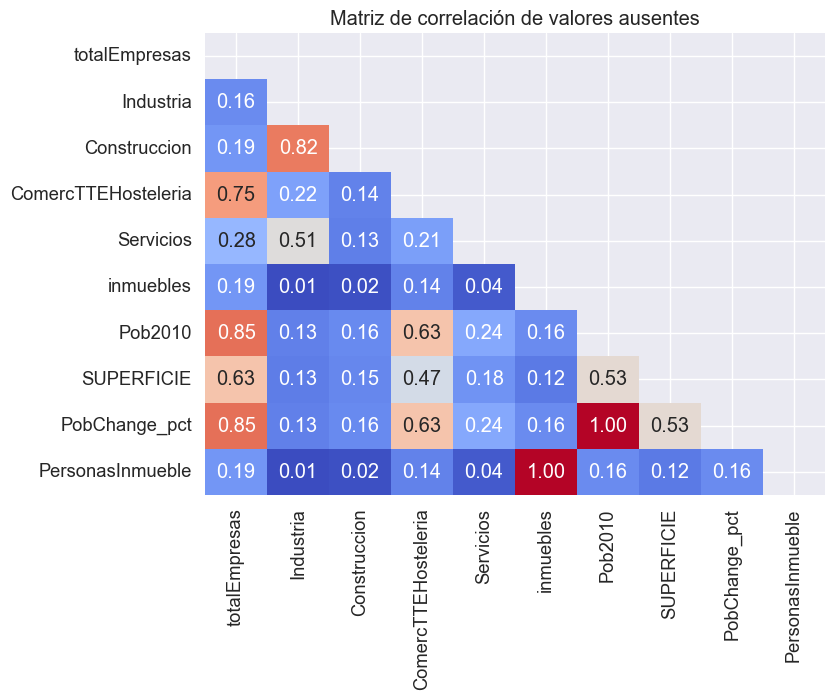

In [66]:
print(X_miss.columns)
patron_perdidos(X_miss)

Como veremos en el apartado 7, las variables que tienen una relacion directa, suelen tener casi los mismos datos missing, veamos los mas destacados y que explicación le puedo dar:
* `inmuebles` y `PersonasInmueble` su relacion es a razón de $PersonasInmueble = \frac{Poblacion}{inmueble}$ y es muy probable que al recopilar los datos de este excel no se imputen los valores de `PersonasInmueble`, sino que simplemente un software realize la division de esos campos. Entonces al faltar el valor de inmueble, este software no podría sacar los resultados
* `PobChange_pct` y `Pob2010`, ocurre exactamente lo mismo que en el caso anterior.
* `Industria`, `Construccion`, `Servicios` y `ComercTTEHosteleria`, tienen relación entre ellos ya que en aquellos municipios donde no imputan los valores de 1 de estos campos, no suelen imputar los valores de los demás campos.
* `totalEmpresas` con otros campos tiene relación la ausencia de valores pero no soy capaz de entender cual es dicha relación.

### 6.1 Imputaciones

A la hora de realizar la imputación pensé que sería buena opción usar los k nearest neighbours, debido a que estamos hablando de poblaciones de personas, y es que está visto que las personas tenemos una influencia en la gente de nuestro alrededor o poblaciones que tienen varios campos parecidos, suelen compartir otros campos. Pero finalmente me decanté por la mediana, ya que la mayoría de los municipios con elementos faltantes o atípicos son poblaciones pequeñas que son las que predominan en España, y estos pueden verse absorbidos por los valores de poblaciones mas grandes, por ello elijo la mediana que puede ser un estadístico más robusto. 
Para los campos cualitativos, que son pocos, creo que la mejor solución sería, por como son estos campos, dar valores aleatorios. 

In [68]:
for col in numericas:
    df[col] = ImputacionCuant(df[col], 'mediana')

for col in categoricas:
    df[col] = ImputacionCuali(df[col], 'aleatorio')

# Reviso que no queden datos missings
df.isna().sum()

Name                            0
CodigoProvincia                 0
CCAA                            0
Population                      0
TotalCensus                     0
AbstentionPtge                  0
AbstencionAlta                  0
Izda_Pct                        0
Dcha_Pct                        0
Otros_Pct                       0
Izquierda                       0
Derecha                         0
Age_0-4_Ptge                    0
Age_under19_Ptge                0
Age_19_65_pct                   0
Age_over65_pct                  0
WomanPopulationPtge             0
ForeignersPtge                  0
SameComAutonPtge                0
SameComAutonDiffProvPtge        0
DifComAutonPtge                 0
UnemployLess25_Ptge             0
Unemploy25_40_Ptge              0
UnemployMore40_Ptge             0
AgricultureUnemploymentPtge     0
IndustryUnemploymentPtge        0
ConstructionUnemploymentPtge    0
ServicesUnemploymentPtge        0
totalEmpresas                   0
Industria     

In [69]:
X_miss = df.drop(columns=out_variables_dependientes+["Name", "CodigoProvincia"])
X = X_miss

## 7. Detección de las relaciones entre las variables.

Antes de realizar la detección de las relaciones entre las variables vamos a echar un vistacillo en el excel y la definición de cada campo para encontrar alguna posible colinealidad. Aquellas que he detectado a simple vista son:

* `totalEmpresas` con [Industria, Construccion, ComercTTEHosteleria, Servicios], puesto es un sumatorio de la lista de las posibles empresas, en otros casos no dan valores a la lista y únicamente tenemos el total de empresas.
* `ActividadPpal` con [Industria, Construccion, ComercTTEHosteleria, Servicios], en este caso el campo "ActividaPpal" nos muestra cual es la actividad predominante entre estas 4. Cuando no están notificados los valores de industria... nos da la etiqueta de "Otros"
* `Densidad` con `Poblacion` y `SUPERFICIE`. Estas variables deberían seguir la relacion: $Densidad = \frac{Poblacion}{SUPERFICIE}$ por lo que, aunque no se pueda detectar una relación lineal, debe haber una relación.
* `PersonasInmuebles` con `inmuebles` y `Poblacion`. También debería seguir la relación $PersonasInmuebles = \frac{Poblacion}{inmuebles}$. Con lo que estamos en el mismo caso que antes

### 7.1. Detección de las relaciones entre las variables input continuas.


In [ ]:
def Vcramer(v, target):
    """
    Calcula el coeficiente V de Cramer entre dos variables. Si alguna de ellas es continua, la discretiza.

    Datos de entrada:
    - v: Serie de datos categóricos o cuantitativos.
    - target: Serie de datos categóricos o cuantitativos.

    Datos de salida:
    - Coeficiente V de Cramer que mide la asociación entre las dos variables.
    """

    if v.dtype == 'float64' or v.dtype == 'int64':

        # Si v es numérica, la discretiza en intervalos y rellena los valores faltantes
        p = sorted(list(set(v.quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0]))))
        v = pd.cut(v, bins=p)
        v = v.fillna(v.min())

    if target.dtype == 'float64' or target.dtype == 'int64':

        # Si target es numérica, la discretiza en intervalos y rellena los valores faltantes
        p = sorted(list(set(target.quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0]))))
        target = pd.cut(target, bins=p)
        target = target.fillna(target.min())

    v = v.reset_index(drop=True)
    target = target.reset_index(drop=True)

    # Calcula una tabla de contingencia entre v y target
    tabla_cruzada = pd.crosstab(v, target)
    # Calcula el chi-cuadrado y el coeficiente V de Cramer
    chi2 = chi2_contingency(tabla_cruzada)[0]
    n = tabla_cruzada.sum().sum()

    v_cramer = np.sqrt(chi2 / (n * (min(tabla_cruzada.shape) - 1)))

    return v_cramer

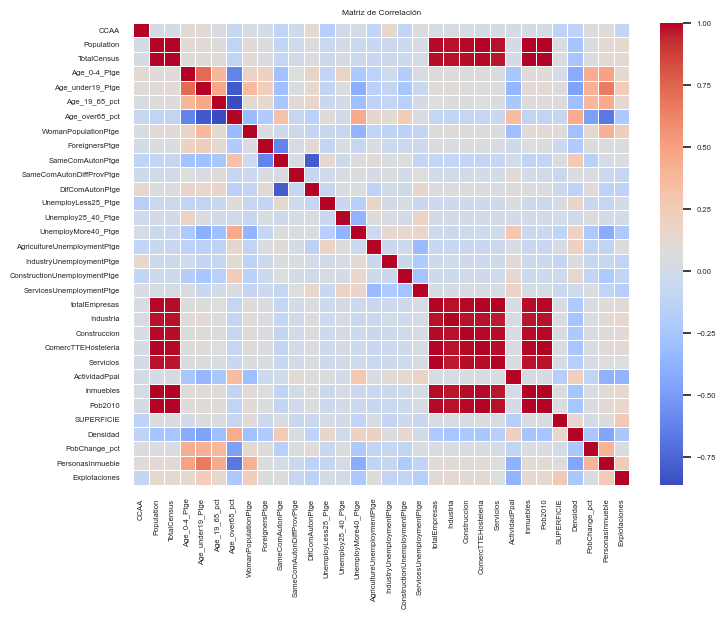

In [119]:
# Calcular matriz de correlación
corr_matrix = X.corr()

# Crear el heatmap con Seaborn
sns.set(font_scale=0.5)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.title("Matriz de Correlación")
plt.show()

Como podemos ver en la imagen anterior se confirma algunas de las predicciones anteriores y podemos nuevas correlaciones:
* `Total de empresas` se relaciona linealmente con [Industria, Construccion, ComercTTEHosteleria, Servicios]
* `Inmuebles` y `Población` tienen una alta correlación, lo cual es compresible, ya que cuantos más habitantes, más inmuebles.
* Además `Inmuebles` y `Población` tienen relación con [Industria, Construccion, ComercTTEHosteleria, Servicios], por el mismo razonamiento anterior
* Los porcentages de edades se relacionan linealmente de manera negativa, cuanto más porcentage hay de uno, menos porcentage habrá de los otros
* `DifcomAuton` y `SamecomAuto` relacion lineal negativa, por el mismo razonamiento anterior. Probablemente sea recomendable eliminar esta variable

### 7.2. Relaciones entre todas las variables input y cada una de las variables objetivo

<font color="red">No entiendo como es posible que en el chi cuadrado (en el caso de la variable dicotomica) me esté sacando de estadístico=0, generando problemas al sacar la chi2</font>

In [133]:
VCramer_df = pd.DataFrame(columns=['Variable', 'Vcramer'])
for campo in X.columns:
    v_cramer = Vcramer(X[campo], Y_cont)
    nuevo_cramer = pd.DataFrame({'Variable': [campo], 'Vcramer': [v_cramer]})
    VCramer_df = pd.concat([VCramer_df, nuevo_cramer], ignore_index=True)

VCramer_df

,Variable,Vcramer
0,CCAA,0.312701
1,Population,0.215627
2,TotalCensus,0.216113
3,Age_0-4_Ptge,0.156607
4,Age_under19_Ptge,0.162203
5,Age_19_65_pct,0.108037
6,Age_over65_pct,0.159166
7,WomanPopulationPtge,0.122935
8,ForeignersPtge,0.079916
9,SameComAutonPtge,0.044350


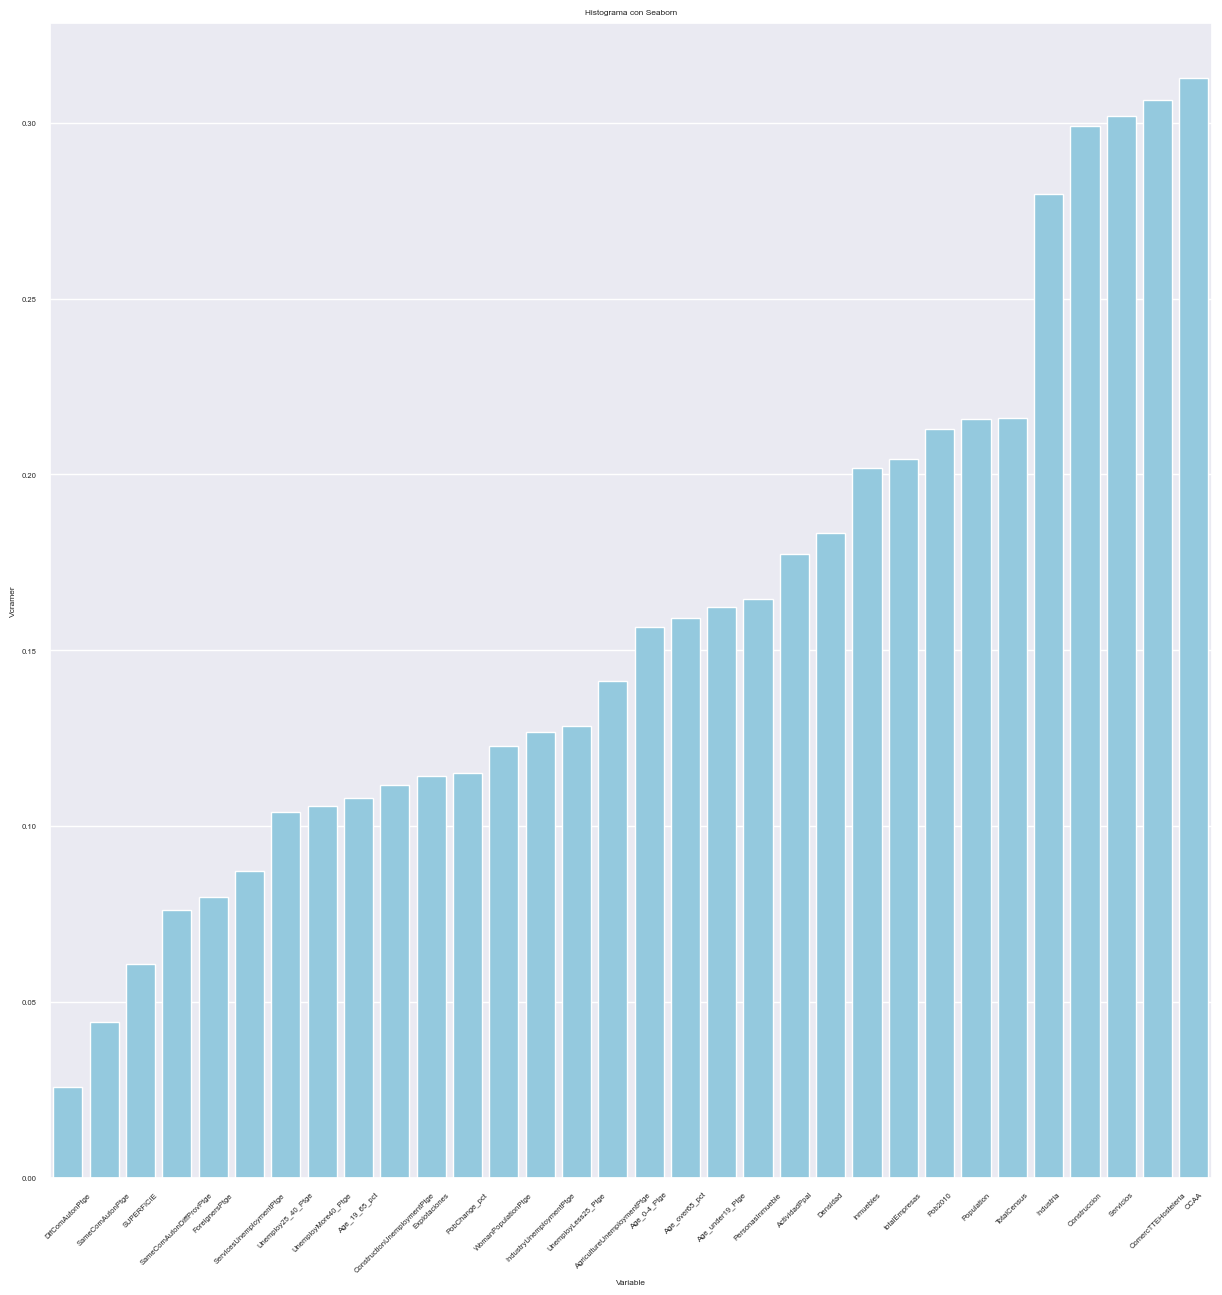

In [137]:
VCramer_df = VCramer_df.sort_values(by="Vcramer")

plt.figure(figsize=(15, 15))
sns.barplot(x="Variable", y="Vcramer", data=VCramer_df, color='skyblue')


plt.title("Histograma con Seaborn")
plt.xticks(rotation=45)
plt.show()

Por lo que parece nuestra variable dependiente continua, depende en gran medida de la CCAA y de los sectores de trabajo de una manera parecida, lo cual puede significar que tal vez en las poblaciones con mas población, suele haber más abstención, como nos muestra `Population` que también tiene un alto valor de Vdecramer

In [130]:
VCramer_df = pd.DataFrame(columns=['Variable', 'Objetivo', 'Vcramer'])
for campo in X.columns:
    v_cramer = Vcramer(X[campo], Y_dico)
    nuevo_cramer = pd.DataFrame({'Variable': [campo], 'Objetivo': [Y_cont.name], 'Vcramer': [v_cramer]})
    VCramer_df = pd.concat([VCramer_df, nuevo_cramer], ignore_index=True)

VCramer_df

,Variable,Objetivo,Vcramer
0,CCAA,AbstentionPtge,NaN
1,Population,AbstentionPtge,NaN
2,TotalCensus,AbstentionPtge,NaN
3,Age_0-4_Ptge,AbstentionPtge,NaN
4,Age_under19_Ptge,AbstentionPtge,NaN
5,Age_19_65_pct,AbstentionPtge,NaN
6,Age_over65_pct,AbstentionPtge,NaN
7,WomanPopulationPtge,AbstentionPtge,NaN
8,ForeignersPtge,AbstentionPtge,NaN
9,SameComAutonPtge,AbstentionPtge,NaN


## 8. Construccion de regresion lineal

### 8.1 Mediante los métodos de selección clásica de variables 


#### 8.1.1. Forward selection
Genero la partición de datos. Pero antes debo convertir las variables categoricas en numeros para que puedan ser leidas por el programa.

<font color="red">He intentado implementar de todas las maneras posibles todas los metodos clasicos de variables pero me da un error constantemente en la interaccion 30 debido a que parece que se modifica (no se como) los datos de X o Y he intentado todo pero no puedo. El entorno tampoco me iba, al final por falta de tiempo lo he dejado así. 
Siento mucho no haberlo podido terminar de ninguna manera, he investigado mucho y entre que soy medio nuevo en programación y en estadística, pues tardo demasiado para cada cosa.</font>

In [73]:
le = LabelEncoder()
for categorica in categoricas:
    X[categorica] = le.fit_transform(X[categorica])

In [74]:
print(X.dtypes)

CCAA                              int32
Population                        int64
TotalCensus                       int64
Age_0-4_Ptge                    float64
Age_under19_Ptge                float64
Age_19_65_pct                   float64
Age_over65_pct                  float64
WomanPopulationPtge             float64
ForeignersPtge                  float64
SameComAutonPtge                float64
SameComAutonDiffProvPtge        float64
DifComAutonPtge                 float64
UnemployLess25_Ptge             float64
Unemploy25_40_Ptge              float64
UnemployMore40_Ptge             float64
AgricultureUnemploymentPtge     float64
IndustryUnemploymentPtge        float64
ConstructionUnemploymentPtge    float64
ServicesUnemploymentPtge        float64
totalEmpresas                   float64
Industria                       float64
Construccion                    float64
ComercTTEHosteleria             float64
Servicios                       float64
ActividadPpal                     int32


In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_cont, test_size = 0.2, random_state = 87327)
X.head(5)


,CCAA,Population,TotalCensus,Age_0-4_Ptge,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,WomanPopulationPtge,ForeignersPtge,SameComAutonPtge,SameComAutonDiffProvPtge,DifComAutonPtge,UnemployLess25_Ptge,Unemploy25_40_Ptge,UnemployMore40_Ptge,AgricultureUnemploymentPtge,IndustryUnemploymentPtge,ConstructionUnemploymentPtge,ServicesUnemploymentPtge,totalEmpresas,Industria,Construccion,ComercTTEHosteleria,Servicios,ActividadPpal,inmuebles,Pob2010,SUPERFICIE,Densidad,PobChange_pct,PersonasInmueble,Explotaciones
0,10,336,282,3.869,18.155,55.059,26.786,44.048,0.89,79.762,0.298,19.345,2.381,54.762,42.857,4.762,9.524,11.905,73.810,15.0,22.0,39.0,99.0,68.0,3,216.0,326.0,4507.5593,2,3.07,1.56,28.0
1,10,429,364,1.632,13.055,56.643,30.302,50.117,1.63,90.909,2.797,7.226,16.216,32.432,51.352,8.108,8.108,10.811,67.568,11.0,22.0,39.0,99.0,68.0,3,382.0,459.0,6270.7646,2,-6.54,1.12,67.0
2,10,569,569,1.230,9.139,54.834,36.027,49.033,0.70,78.910,0.703,18.102,8.197,36.066,55.737,22.951,9.836,13.115,49.180,49.0,22.0,39.0,99.0,68.0,3,918.0,674.0,5702.1000,2,-15.58,0.62,74.0
3,10,822,704,4.258,14.964,60.098,24.938,51.095,0.12,93.917,0.487,5.109,7.407,61.111,31.482,16.667,5.556,16.667,59.259,50.0,22.0,39.0,99.0,68.0,3,599.0,842.0,9106.4649,2,-2.38,1.37,66.0
4,10,623,540,3.531,15.569,59.391,25.040,48.154,0.64,93.258,0.161,4.173,15.385,48.077,36.538,21.154,11.111,11.538,61.538,22.0,22.0,39.0,99.0,68.0,3,394.0,625.0,4007.6141,2,-0.32,1.58,96.0


In [76]:
np.any(np.isnan(y_train))

False

In [77]:
x_train.isna().any().any()

False

In [78]:
print(len(x_train))
print(len(y_train))

6493
6493


In [79]:
modelo_inicial = sm.OLS(y_train, np.ravel([1] * len(x_train))).fit()

In [86]:
def lm_forward_(varObjCont, datos, var_cont, var_categ, var_interac = [], metodo = 'AIC'):
    """
    Esta función realiza una selección de variables hacia adelante (step forward)
    para un modelo de regresión lineal. El objetivo es encontrar el mejor conjunto
    de variables para predecir 'varObjCont' utilizando el criterio 'metodo' (AIC o BIC).
    
    Argumentos de entrada:
    - varObjCont: La variable objetivo (dependiente) que deseamos predecir.
    - datos: El DataFrame que contiene todas las variables.
    - var_cont: Una lista de nombres de variables continuas.
    - var_categ: Una lista de nombres de variables categóricas.
    - var_interac: Una lista de nombres de variables de interacción (por defecto, una lista vacía).
    - metodo: El criterio para seleccionar variables ('AIC' o 'BIC', por defecto 'AIC').
    
    Argumentos de salida:
    - Un modelo de regresión lineal que utiliza el mejor conjunto de variables encontrado.
    """
    print(x_train.isna().any().any())
    print(np.any(np.isnan(y_train)))
    # Crear una lista 'variables' que contiene todas las variables a considerar.
    variables = var_cont + var_categ + var_interac
    # Inicializar listas para almacenar las variables seleccionadas.
    var_cont_final, var_categ_final, var_interac_final = [], [], []

    # Definir la función 'calcular_metrica' dependiendo del método de bondad de ajuste selecionado.
    if metodo == 'AIC':
        def calcular_metrica(modelo):
            return 2 * (modelo.df_model + 1) - 2 * modelo.llf
    elif metodo == 'BIC':
        def calcular_metrica(modelo):
            return np.log(len(datos)) * (modelo.df_model + 1) - 2 * modelo.llf

    # Ajustar un modelo inicial con una sola constante.
    modelo_inicial = sm.OLS(varObjCont, np.ones(len(datos))).fit()   ###########################################################Cambio mio
    metrica_inicial = calcular_metrica(modelo_inicial)
    dif_metrica = 1

    print('Start: ' + metodo + ' = ' + str(metrica_inicial))
    print('')
    print('y ~ 1')
    print('')
    index2 = 0
    # Comenzar el bucle de selección de variables.
    while((dif_metrica > 0) and (len(variables) > 0)):
        variables_probar = []
        metricas = []
        index2 += 1
        print(index2)
        # Iterar a través de las variables restantes.
        index = 0
        for x in variables:
            index += 1
            print(index)
            var_cont_probar, var_categ_probar, var_interac_probar = var_cont_final, var_categ_final, var_interac_final
            if x in var_cont:
                var_cont_probar = var_cont_final + [x]
            elif x in var_categ:
                var_categ_probar = var_categ_final + [x]
            else:
                var_interac_probar = var_interac_final + [x]

            # Ajustar un modelo con la variable actual y calcular la métrica.
            modelo = lm(varObjCont, datos, var_cont_probar, var_categ_probar, var_interac_probar)['Modelo']
            variables_probar.append(x)
            metricas.append(calcular_metrica(modelo))
        
        # Imprimir métricas de AIC/BIC para las variables probadas.
        print(pd.DataFrame({
            'Variable': [' + ' + str(x) for x in variables_probar], metodo: metricas
            }).sort_values(metodo).to_string(index = False))
        print('')
        
        # Elegir la mejor variable y su métrica actual.
        mejor_variable = variables_probar[min(enumerate(metricas), key = lambda x: x[1])[0]]
        metrica_actual = metricas[min(enumerate(metricas), key = lambda x: x[1])[0]]

        # Agregar la mejor variable al conjunto final apropiado.
        if mejor_variable in var_cont:
            var_cont_final.append(mejor_variable)
        elif mejor_variable in var_categ:
            var_categ_final.append(mejor_variable)
        else:
            var_interac_final.append(mejor_variable)
        
        # Actualizar la diferencia en métrica, las variables y el modelo inicial.
        dif_metrica = metrica_inicial - metrica_actual
        variables = [x for x in variables if x != mejor_variable]
        metrica_inicial = metrica_actual
        modelo_inicial = modelo
        
        # Gestionar la eliminación de variables si la métrica no mejora.
        if dif_metrica <= 0:
            if mejor_variable in var_cont:
                var_cont_final = [x for x in var_cont_final if x != mejor_variable]
            elif mejor_variable in var_categ:
                var_categ_final = [x for x in var_categ_final if x != mejor_variable]
            else:
                var_interac_final = [x for x in var_interac_final if x != mejor_variable]
        else:
            # Imprimir el modelo y la métrica actual si la métrica mejora.
            formula = ' + '.join(var_cont_final + var_categ_final + ['*'.join(x) for x in var_interac_final])
            print('--------------------------------------- Step Forward: Entra ' + str(mejor_variable))
            print('')
            print('AIC = ' + str(metrica_inicial))
            print('')
            print('y ~ ' + formula)
            print('')
    
    # Devolver el modelo final con el conjunto de variables seleccionado.
    return lm(varObjCont, datos, var_cont_final, var_categ_final, var_interac_final)

In [88]:
# Creo el modelo
interacciones = list(itertools.combinations(numericas,2))
numericas= list(numericas)
#modelo1 = lm_forward_(y_train, x_train, numericas, categoricas, interacciones, "AIC")
# La funcion de arriba es la que me da problemas